# **Prophet model**

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from aggregate import *

## Approach number one:

Transforming our Series to Dataframes

In [176]:
ts_admin=pd.DataFrame({'ds':ts_admin.index,'y':ts_admin.values})
ts_autre=pd.DataFrame({'ds':ts_autre.index,'y':ts_autre.values})
ts_centre_com=pd.DataFrame({'ds':ts_centre_com.index,'y':ts_centre_com.values})
ts_occup_cont=pd.DataFrame({'ds':ts_occup_cont.index,'y':ts_occup_cont.values})

We split the training set ( $= 90 \% $ of data)

In [177]:
admin_start_predict=round(ts_admin.shape[0]*0.9)
autre_start_predict=round(ts_autre.shape[0]*0.9)
centre_com_start_predict=round(ts_centre_com.shape[0]*0.9)
occup_cont_start_predict=round(ts_occup_cont.shape[0]*0.9)


In [178]:
ts_admin_train=ts_admin.iloc[:admin_start_predict,:]
ts_autre_train=ts_autre.iloc[:autre_start_predict,:]
ts_centre_com_train=ts_centre_com.iloc[:centre_com_start_predict,:]
ts_occup_cont_train=ts_occup_cont.iloc[:occup_cont_start_predict,:]


**Fitting the model for each category and plotting the forecast:**

**a) admin**

In [179]:
model_admin=Prophet()

model_admin.fit(ts_admin_train)

future=model_admin.make_future_dataframe(periods=ts_admin.shape[0]-admin_start_predict)

forecast_admin=model_admin.predict(future)


02:01:53 - cmdstanpy - INFO - Chain [1] start processing
02:01:53 - cmdstanpy - INFO - Chain [1] done processing


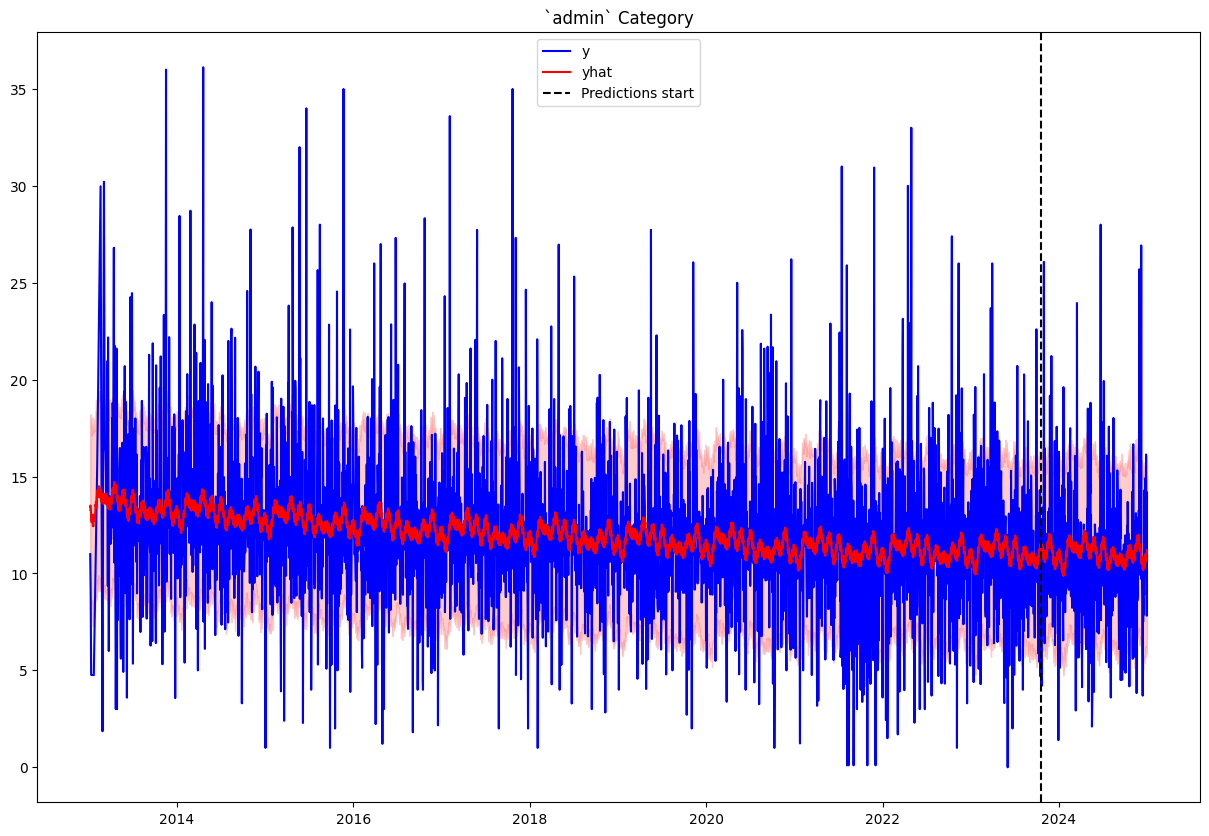

In [180]:
fig=plt.figure(figsize=(15,10))

plt.plot(ts_admin["ds"], ts_admin["y"], label="y", color="blue")

plt.plot(forecast_admin["ds"], forecast_admin["yhat"], label="yhat", color="red")

plt.axvline(x=list(ts_admin_train.ds)[-1], color="black", linestyle="--",label="Predictions start")

plt.fill_between(forecast_admin["ds"], forecast_admin["yhat_lower"], forecast_admin["yhat_upper"], color="red", alpha=0.2)

plt.legend()

plt.title("`admin` Category")

plt.show()

#### Compute error metrics

In [181]:
mae = mean_absolute_error(ts_admin["y"], forecast_admin["yhat"])
rmse = np.sqrt(mean_squared_error(ts_admin["y"], forecast_admin["yhat"]))
r2 = r2_score(ts_admin["y"], forecast_admin["yhat"])

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2.61
RMSE: 3.73
R² Score: 0.06


**b) autre**

In [182]:
model_autre=Prophet()

model_autre.fit(ts_autre_train)

future=model_autre.make_future_dataframe(periods=ts_autre.shape[0]-autre_start_predict)

forecast_autre=model_autre.predict(future)

02:01:54 - cmdstanpy - INFO - Chain [1] start processing
02:01:54 - cmdstanpy - INFO - Chain [1] done processing


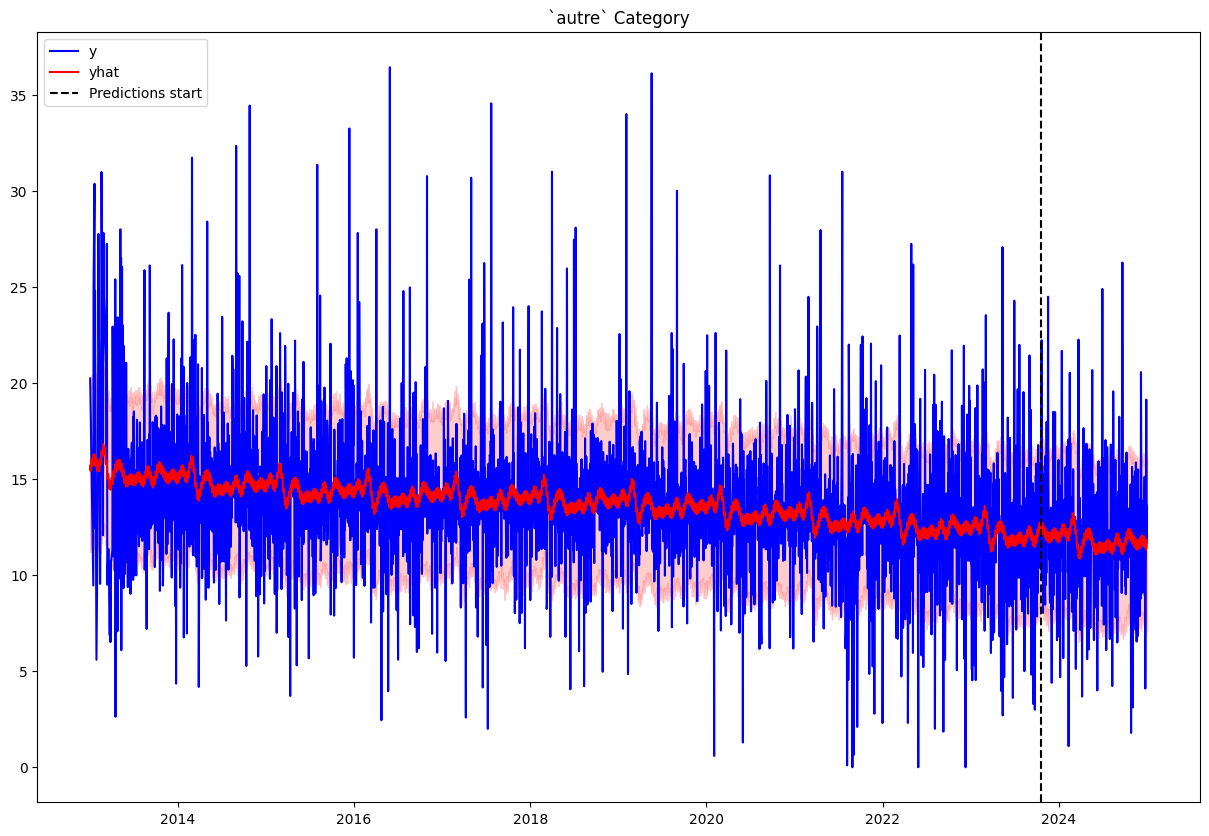

In [183]:
fig=plt.figure(figsize=(15,10))

plt.plot(ts_autre["ds"], ts_autre["y"], label="y", color="blue")

plt.plot(forecast_autre["ds"], forecast_autre["yhat"], label="yhat", color="red")

plt.axvline(x=list(ts_autre_train.ds)[-1], color="black", linestyle="--",label="Predictions start")

plt.fill_between(forecast_autre["ds"], forecast_autre["yhat_lower"], forecast_autre["yhat_upper"], color="red", alpha=0.2)

plt.legend()

plt.title("`autre` Category")

plt.show()

#### Compute error metrics

In [184]:
mae = mean_absolute_error(ts_autre["y"], forecast_autre["yhat"])
rmse = np.sqrt(mean_squared_error(ts_autre["y"], forecast_autre["yhat"]))
r2 = r2_score(ts_autre["y"], forecast_autre["yhat"])

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2.24
RMSE: 3.31
R² Score: 0.10


**c) centre_com**

In [185]:
model_centre_com=Prophet()

model_centre_com.fit(ts_centre_com_train)

future=model_centre_com.make_future_dataframe(periods=ts_centre_com.shape[0]-centre_com_start_predict)

forecast_centre_com=model_centre_com.predict(future)

02:01:55 - cmdstanpy - INFO - Chain [1] start processing
02:01:55 - cmdstanpy - INFO - Chain [1] done processing


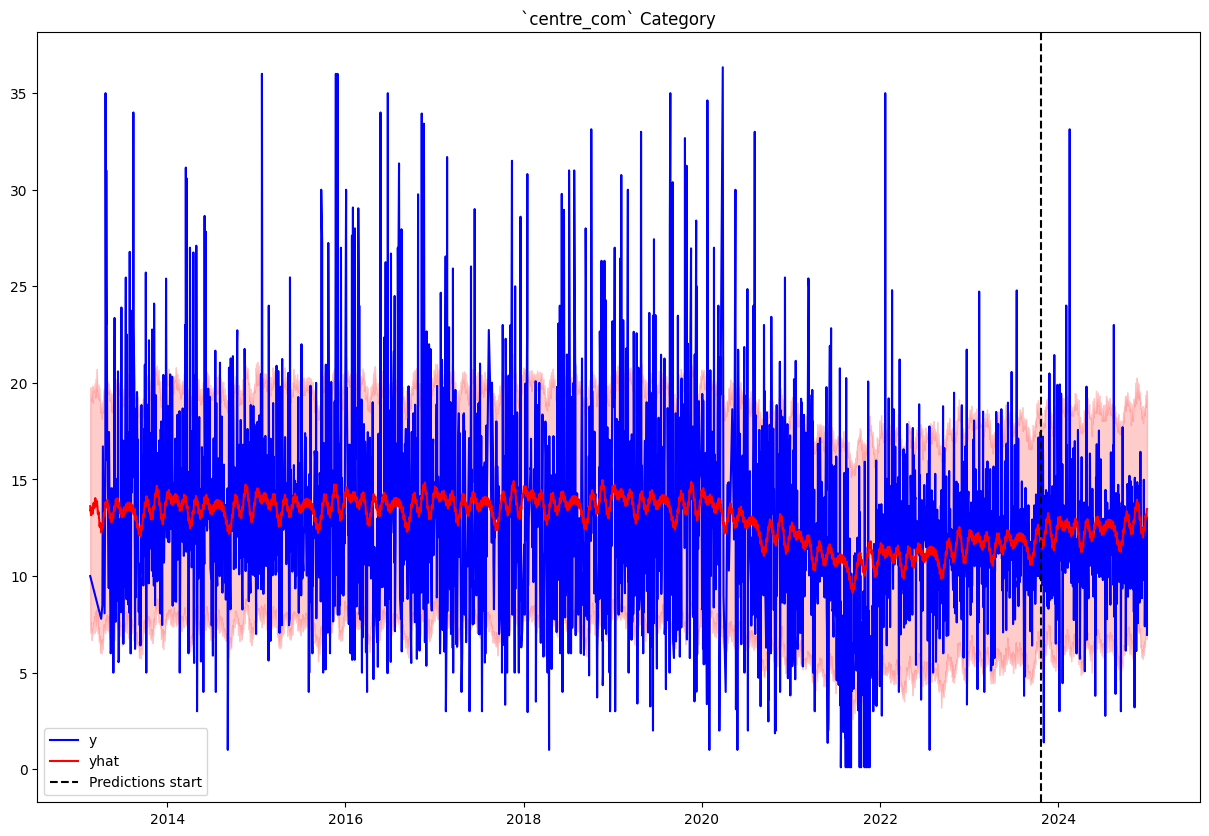

In [186]:
fig=plt.figure(figsize=(15,10))

plt.plot(ts_centre_com["ds"], ts_centre_com["y"], label="y", color="blue")

plt.plot(forecast_centre_com["ds"], forecast_centre_com["yhat"], label="yhat", color="red")

plt.axvline(x=list(ts_centre_com_train.ds)[-1], color="black", linestyle="--",label="Predictions start")

plt.fill_between(forecast_centre_com["ds"], forecast_centre_com["yhat_lower"], forecast_centre_com["yhat_upper"], color="red", alpha=0.2)

plt.legend()

plt.title("`centre_com` Category")

plt.show()

#### Compute error metrics

In [187]:
mae = mean_absolute_error(ts_centre_com["y"], forecast_centre_com["yhat"])
rmse = np.sqrt(mean_squared_error(ts_centre_com["y"], forecast_centre_com["yhat"]))
r2 = r2_score(ts_centre_com["y"], forecast_centre_com["yhat"])

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3.40
RMSE: 4.65
R² Score: 0.07


**d) occup_cont**

In [188]:
model_occup_cont=Prophet()

model_occup_cont.fit(ts_occup_cont_train)

future=model_occup_cont.make_future_dataframe(periods=ts_occup_cont.shape[0]-occup_cont_start_predict)

forecast_occup_cont=model_occup_cont.predict(future)

02:01:56 - cmdstanpy - INFO - Chain [1] start processing
02:01:56 - cmdstanpy - INFO - Chain [1] done processing


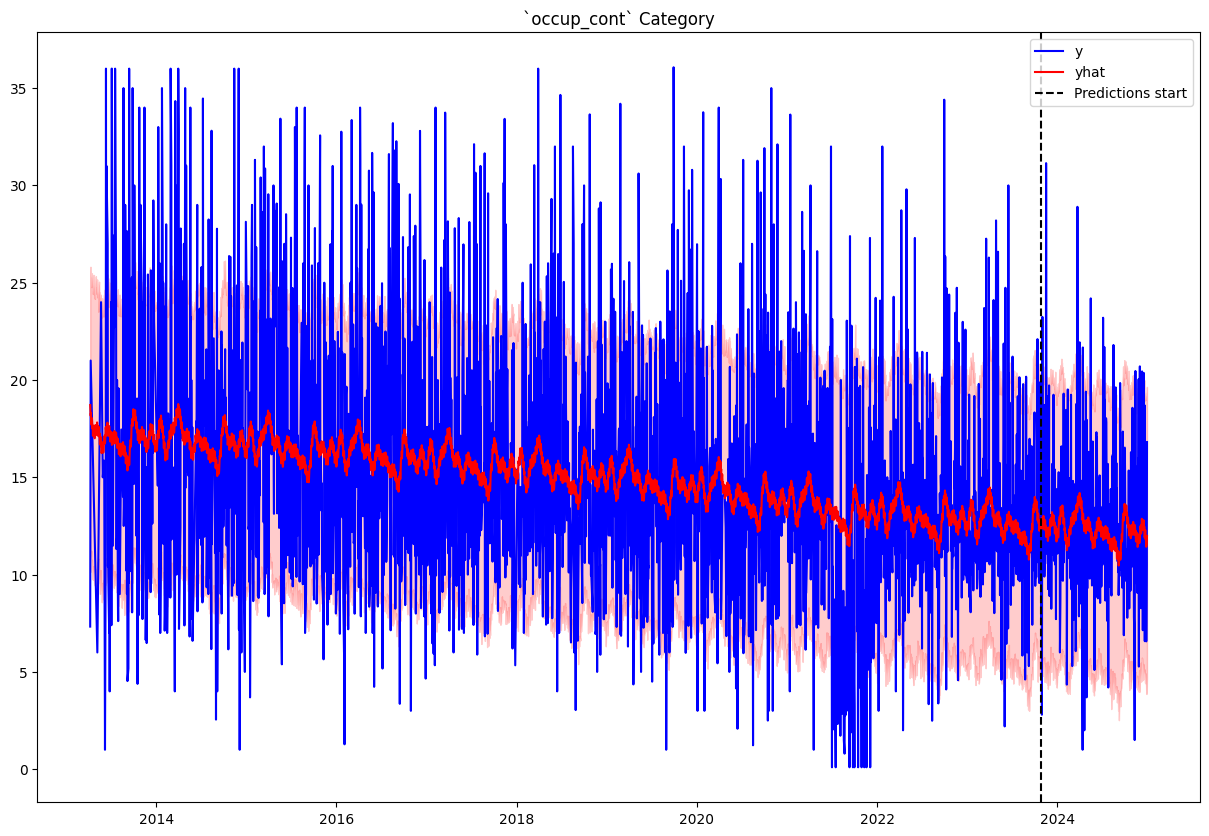

In [189]:
fig=plt.figure(figsize=(15,10))

plt.plot(ts_occup_cont["ds"], ts_occup_cont["y"], label="y", color="blue")

plt.plot(forecast_occup_cont["ds"], forecast_occup_cont["yhat"], label="yhat", color="red")

plt.axvline(x=list(ts_occup_cont_train.ds)[-1], color="black", linestyle="--",label="Predictions start")

plt.fill_between(forecast_occup_cont["ds"], forecast_occup_cont["yhat_lower"], forecast_occup_cont["yhat_upper"], color="red", alpha=0.2)

plt.legend()

plt.title("`occup_cont` Category")

plt.show()

In [190]:
forecast_occup_cont.shape[0]-ts_occup_cont.shape[0]

0

#### Compute error metrics

In [191]:
mae = mean_absolute_error(ts_occup_cont["y"], forecast_occup_cont["yhat"])
rmse = np.sqrt(mean_squared_error(ts_occup_cont["y"], forecast_occup_cont["yhat"]))
r2 = r2_score(ts_occup_cont["y"], forecast_occup_cont["yhat"])

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4.16
RMSE: 5.56
R² Score: 0.09


## Approach number two:

In [192]:
model=Prophet()

model.add_regressor('annee_construction')
model.add_regressor('surface_utile')
model.add_regressor('code_postal')
model.add_regressor('coord_x')
model.add_regressor('coord_y')
model.add_regressor('num_departement')

### $1^{st}$ category

In [193]:
model.fit(data_admin)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.